In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# 数据预处理
# 导入数据并显示前6行数据来检查数据是否正确
from matplotlib import category


df = pd.read_csv('死亡人数.csv',encoding='gbk')
bf = pd.read_csv('出生人数.csv',encoding='gbk')
pf = pd.read_csv('population-and-demography.csv',encoding='gbk')
pd.set_option('display.max_columns',100000)
display(df.head(6))
display(bf.head(6))
display(pf.head(6))

,Country name,Year,Deaths,Deaths of children under the age of 1,Deaths of children under the age of 5,Deaths aged 1 to 4 years,Deaths aged 5 to 9 years,Deaths aged 10 to 14 years,Deaths aged 15 to 19 years,Deaths aged 20 to 29 years,Deaths aged 30 to 39 years,Deaths aged 40 to 49 years,Deaths aged 50 to 59 years,Deaths aged 60 to 69 years,Deaths aged 70 to 79 years,Deaths aged 80 to 89 years,Deaths aged 90 to 99 years,deaths__all__20_24__records,deaths__all__25_29__records,deaths__all__30_34__records,deaths__all__35_39__records,deaths__all__40_44__records,deaths__all__45_49__records,deaths__all__50_54__records,deaths__all__55_59__records,deaths__all__60_64__records,deaths__all__65_69__records,deaths__all__70_74__records,deaths__all__75_79__records,deaths__all__80_84__records,deaths__all__85_89__records,deaths__all__90_94__records,deaths__all__95_99__records,deaths__all__0_9__records,deaths__all__10_19__records,deaths__all__100plus__records
0,Afghanistan,1950,283668,106003.000000,156547.000000,50544.000000,10043.000000,6549.000000,7752.000000,18036.000000,17161.000000,16389.000000,17605.000000,18715.000000,12380.000000,2434.000000,55.000000,9196.000000,8840.000000,8684.000000,8477.000000,8285.000000,8104.000000,8639.000000,8966.000000,9698.000000,9017.000000,7515.000000,4865.000000,1987.000000,447.000000,51.000000,4.000000,166590.000000,14301.000000,0.000000
1,Afghanistan,1951,282577,105086.000000,154810.000000,49724.000000,10225.000000,6588.000000,7802.000000,18161.000000,17247.000000,16367.000000,17521.000000,18681.000000,12536.000000,2594.000000,49.000000,9249.000000,8912.000000,8732.000000,8515.000000,8288.000000,8079.000000,8611.000000,8910.000000,9663.000000,9018.000000,7573.000000,4963.000000,2100.000000,494.000000,47.000000,2.000000,165035.000000,14390.000000,0.000000
2,Afghanistan,1952,280803,105028.000000,153384.000000,48356.000000,10305.000000,6560.000000,7794.000000,18121.000000,17179.000000,16218.000000,17323.000000,18531.000000,12615.000000,2716.000000,58.000000,9211.000000,8910.000000,8703.000000,8476.000000,8240.000000,7978.000000,8544.000000,8779.000000,9578.000000,8953.000000,7583.000000,5032.000000,2192.000000,524.000000,54.000000,4.000000,163689.000000,14354.000000,0.000000
3,Afghanistan,1953,279684,104949.000000,152620.000000,47671.000000,10321.000000,6540.000000,7787.000000,18077.000000,17114.000000,16081.000000,17139.000000,18401.000000,12700.000000,2828.000000,71.000000,9169.000000,8908.000000,8676.000000,8438.000000,8208.000000,7873.000000,8492.000000,8647.000000,9508.000000,8893.000000,7600.000000,5100.000000,2274.000000,554.000000,65.000000,6.000000,162941.000000,14327.000000,0.000000
4,Afghanistan,1954,280476,104767.000000,152387.000000,47620.000000,10480.000000,6716.000000,7914.000000,18244.000000,17234.000000,16109.000000,17108.000000,18404.000000,12849.000000,2949.000000,81.000000,9244.000000,9000.000000,8749.000000,8485.000000,8253.000000,7856.000000,8508.000000,8600.000000,9508.000000,8896.000000,7661.000000,5188.000000,2355.000000,594.000000,76.000000,5.000000,162867.000000,14630.000000,0.000000
5,Afghanistan,1955,277695,104369.000000,151685.000000,47316.000000,10080.000000,6554.000000,7738.000000,17931.000000,16981.000000,15833.000000,16778.000000,18137.000000,12835.000000,3051.000000,91.000000,9074.000000,8857.000000,8625.000000,8356.000000,8133.000000,7700.000000,8355.000000,8423.000000,9353.000000,8784.000000,7621.000000,5214.000000,2414.000000,637.000000,85.000000,6.000000,161765.000000,14292.000000,0.000000


,Country name,Year,Births,Births from mothers aged 15 to 19 years,Births from mothers aged 20 to 24 years,Births from mothers aged 25 to 29 years,Births from mothers aged 30 to 34 years,Births from mothers aged 35 to 39 years,Births from mothers aged 40 to 44 years,Births from mothers aged 45 to 49 years,births__all__10_14__records,births__all__50_54__records
0,Afghanistan,1950,365303.000000,49818.000000,92189.000000,85980.000000,65730.000000,43741.000000,19594.000000,3787.000000,4312.000000,152.000000
1,Afghanistan,1951,372040.000000,50953.000000,94080.000000,87531.000000,66674.000000,44425.000000,19959.000000,3865.000000,4396.000000,157.000000
2,Afghanistan,1952,378290.000000,52179.000000,95550.000000,88980.000000,67546.000000,45142.000000,20417.000000,3938.000000,4383.000000,158.000000
3,Afghanistan,1953,384933.000000,53106.000000,97439.000000,90483.000000,68756.000000,45803.000000,20751.000000,4010.000200,4423.000000,161.000000
4,Afghanistan,1954,390412.000000,53903.000000,98920.000000,92193.000000,69592.000000,46370.000000,20926.000000,4038.000000,4310.000000,162.000000
5,Afghanistan,1955,397156.000000,54626.000000,100864.000000,93698.000000,71062.000000,47076.000000,21180.000000,4162.000000,4319.000000,170.000000


,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,Population at age 1,Population aged 1 to 4 years,Population aged 5 to 9 years,Population aged 10 to 14 years,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,population__all__20_24__records,population__all__25_29__records,population__all__30_34__records,population__all__35_39__records,population__all__40_44__records,population__all__45_49__records,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.000000,1248282,3068855,4494349,4198587,4411609,3946595,258652.020000,946547.000000,966210,854363,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.000000,668381,572967,490853,419100,354954,306853,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.000000,1246857,3105444,4552138,4250002,4466098,3993640,254304.000000,947489.000000,991791,866796,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.000000,678078,582826,498044,424721,358366,308649,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.000000,1248220,3145070,4613604,4303436,4522464,4041439,252906.000000,942827.000000,1017993,878857,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.000000,687123,593165,505315,430323,362547,309944,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.000000,1254725,3186382,4676232,4356242,4578167,4088379,258717.020000,943151.000000,1039950,891707,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.000000,695542,603261,512568,435753,367127,310937,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.000000,1267817,3231060,4741371,4408474,4633229,4136116,264765.000000,950233.000000,1055592,907651,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.000000,704095,612673,520189,441295,371806,312347,263301,211816,164736,113474,67953,31345,9963,1830,179,11
5,Afghanistan,1955,7971933,323910.000000,1291129,3281470,4812348,4462830,4690463,4187921,270904.000000,967219.000000,1062420,927921,817550,1334989,975801,691279,477664,279789,100839,12342,210,0.000000,713328,621661,528451,447350,376656,314623,265166,212498,165547,114242,68813,32026,10355,1987,201,9


In [94]:
# 合并数据集
df = df.set_index(['Country name', 'Year'], drop=True)
bf = bf.set_index(['Country name', 'Year'], drop=True)
pf = pf.set_index(['Country name', 'Year'], drop =True)
bd = pd.merge(df,bf,on=['Country name','Year'])
bd = pd.merge(bd,pf,on=['Country name','Year'])
display(bd)

Deaths  Deaths of children under the age of 1  \
Country name Year                                                  
Afghanistan  1950  283668                          106003.000000   
             1951  282577                          105086.000000   
             1952  280803                          105028.000000   
             1953  279684                          104949.000000   
             1954  280476                          104767.000000   
...                   ...                                    ...   
Zimbabwe     2017  122177                           18619.000000   
             2018  120252                           18057.000000   
             2019  123744                           18038.000000   
             2020  127551                           17903.000000   
             2021  144973                           17964.000000   

                   Deaths of children under the age of 5  \
Country name Year                                          
Afghanistan  1950                          156547.000000   
             1951                          154810.000000   
             1952                          153384.000000   
             1953                          152620.000000   
             1954                          152387.000000   
...                                                  ...   
Zimbabwe     2017                           26780.000000   
             2018                           25638.000000   
             2019                           25642.000000   
             2020                           25292.000000   
             2021                           25364.000000   

                   Deaths aged 1 to 4 years  Deaths aged 5 to 9 years  \
Country name Year                                                       
Afghanistan  1950              50544.000000              10043.000000   
             1951              49724.000000              10225.000000   
             1952              48356.000000              10305.000000   
             1953              47671.000000              10321.000000   
             1954              47620.000000              10480.000000   
...                                     ...                       ...   
Zimbabwe     2017               8161.000000               2854.000000   
             2018               7581.000000               2733.000000   
             2019               7604.000000               2885.000000   
             2020               7389.000000               2748.000000   
             2021               7400.000000               2746.000000   

                   Deaths aged 10 to 14 years  Deaths aged 15 to 19 years  \
Country name Year                                                           
Afghanistan  1950                 6549.000000                 7752.000000   
             1951                 6588.000000                 7802.000000   
             1952                 6560.000000                 7794.000000   
             1953                 6540.000000                 7787.000000   
             1954                 6716.000000                 7914.000000   
...                                       ...                         ...   
Zimbabwe     2017                 2067.000000                 3356.000000   
             2018                 1955.000000                 3286.000000   
             2019                 2031.000000                 3371.000000   
             2020                 1975.000000                 3017.000000   
             2021                 2066.000000                 3467.000000   

                   Deaths aged 20 to 29 years  Deaths aged 30 to 39 years  \
Country name Year                                                           
Afghanistan  1950                18036.000000                17161.000000   
             1951                18161.000000                17247.000000   
             1952                18121.000000                17179.000000   
             195

In [86]:
# 数据清洗
bd.isnull().sum() # 查看缺失值
for i in bd.columns:
    x = bd[i].mean()# 计算每列的均值
    bd.fillna({i:x}, inplace=True) # 用均值填充缺失值
bd.isnull().sum() # 查看缺失值是否全部处理完毕

Deaths                                     0
Deaths of children under the age of 1      0
Deaths of children under the age of 5      0
Deaths aged 1 to 4 years                   0
Deaths aged 5 to 9 years                   0
Deaths aged 10 to 14 years                 0
Deaths aged 15 to 19 years                 0
Deaths aged 20 to 29 years                 0
Deaths aged 30 to 39 years                 0
Deaths aged 40 to 49 years                 0
Deaths aged 50 to 59 years                 0
Deaths aged 60 to 69 years                 0
Deaths aged 70 to 79 years                 0
Deaths aged 80 to 89 years                 0
Deaths aged 90 to 99 years                 0
deaths__all__20_24__records                0
deaths__all__25_29__records                0
deaths__all__30_34__records                0
deaths__all__35_39__records                0
deaths__all__40_44__records                0
deaths__all__45_49__records                0
deaths__all__50_54__records                0
deaths__al

In [87]:
# 清洗字符串格式
import dis
import re

from numpy import disp
for i in bd.columns:
    if bd[i].dtype == 'object':
        bd[i] = bd[i].apply(lambda x: re.sub(r'[^\w\s]','',x))

# 显示数据
pd.set_option('display.max_columns',100)
display(bd.head())

Deaths  Deaths of children under the age of 1  \
Country name Year                                                  
Afghanistan  1950  283668                          106003.000000   
             1951  282577                          105086.000000   
             1952  280803                          105028.000000   
             1953  279684                          104949.000000   
             1954  280476                          104767.000000   

                   Deaths of children under the age of 5  \
Country name Year                                          
Afghanistan  1950                          156547.000000   
             1951                          154810.000000   
             1952                          153384.000000   
             1953                          152620.000000   
             1954                          152387.000000   

                   Deaths aged 1 to 4 years  Deaths aged 5 to 9 years  \
Country name Year                                                       
Afghanistan  1950              50544.000000              10043.000000   
             1951              49724.000000              10225.000000   
             1952              48356.000000              10305.000000   
             1953              47671.000000              10321.000000   
             1954              47620.000000              10480.000000   

                   Deaths aged 10 to 14 years  Deaths aged 15 to 19 years  \
Country name Year                                                           
Afghanistan  1950                 6549.000000                 7752.000000   
             1951                 6588.000000                 7802.000000   
             1952                 6560.000000                 7794.000000   
             1953                 6540.000000                 7787.000000   
             1954                 6716.000000                 7914.000000   

                   Deaths aged 20 to 29 years  Deaths aged 30 to 39 years  \
Country name Year                                                           
Afghanistan  1950                18036.000000                17161.000000   
             1951                18161.000000                17247.000000   
             1952                18121.000000                17179.000000   
             1953                18077.000000                17114.000000   
             1954                18244.000000                17234.000000   

                   Deaths aged 40 to 49 years  Deaths aged 50 to 59 years  \
Country name Year                                                           
Afghanistan  1950                16389.000000                17605.000000   
             1951                16367.000000                17521.000000   
             1952                16218.000000                17323.000000   
             1953                16081.000000                17139.000000   
             1954                16109.000000                17108.000000   

                   Deaths aged 60 to 69 years  Deaths aged 70 to 79 years  \
Country name Year                                                           
Afghanistan  1950                18715.000000                12380.000000   
             1951                18681.000000                12536.000000   
             1952                18531.000000                12615.000000   
             1953                18401.000000                12700.000000   
             1954                18404.000000                12849.000000   

                   Deaths aged 80 to 89 years  Deaths aged 90 to 99 years  \
Country name Year                                                           
Afghanistan  1950                 2434.000000                   55.000000   
             1951                 2594.000000                   49.000000   
             1952                 2716.000000                   58.000000   
             1953                 2828.000000                   

In [88]:
# 数据分析
# 总览分析
# 计算全球总出生人数和总死亡人数
total_birth = bd.loc[('World'), 'Births'].astype('float64').sum() # type: ignore
display(total_birth)
total_death = bd.loc[('World'), 'Deaths'].astype('float64').sum() # type: ignore
display(total_death)
# 计算各国的总出生人数和总死亡人数
index = bd.index.levels[0] # type: ignore  levels在新版本pandas中被移除
display(index)
a = []
b = []
for i in index:
    values = bd.loc[i, 'Births'].astype('float64').sum() # type: ignore
    values2 = bd.loc[i, 'Deaths'].astype('float64').sum() # type: ignore
    b.append(values2)
    a.append(values)
pd.set_option('display.float_format', lambda x: '{:f}'.format(x))  # 将 '{:f}' 替换为您所需的格式
births_sum = pd.Series(a, index=index) 
deaths_sum = pd.Series(b, index=index) 
bd_sum = pd.DataFrame({'Births_sum': births_sum, 'Deaths_sum': deaths_sum})
display(bd_sum)

9119585530.0

3655573526.0

Index(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country name', length=255)

,Births_sum,Deaths_sum
Country name,,
Afghanistan,54457522.030000,18822918.000000
Africa (UN),1847306968.000000,634094027.000000
Albania,4433527.004000,1585571.000000
Algeria,52154240.030000,15394881.000000
American Samoa,87023.000000,15017.000000
...,...,...
Western Sahara,386737.999500,134665.000000
World,9119585530.000000,3655573526.000000
Yemen,42962691.040000,11958923.000000


In [89]:
# 排序并输出死亡人数,出生人数的前十国家
bd_sum.sort_values(by='Births_sum', ascending=False, inplace=True)
b_country = bd_sum.head(10).index
print("出生人数前十:")
display(b_country)
bd_sum.sort_values(by='Deaths_sum', ascending=False, inplace=True)
d_country = bd_sum.head(10).index
print("死亡人数前十:")
display(d_country)

出生人数前十:


Index(['World', 'Less developed regions',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China', 'Asia (UN)',
       'Lower-middle-income countries', 'Upper-middle-income countries',
       'Africa (UN)', 'India', 'China'],
      dtype='object', name='Country name')

死亡人数前十:


Index(['World', 'Less developed regions',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China', 'Asia (UN)',
       'Lower-middle-income countries', 'Upper-middle-income countries',
       'More developed regions', 'China', 'India'],
      dtype='object', name='Country name')

,Births,Deaths,Population,births_rate,deaths_rate
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,126660910.138889,50771854.527778,5008492981.944445,0.027378,0.011200
std,14449282.767400,4099728.332301,1655973005.753054,0.006498,0.003539
min,92083256.000000,46406404.000000,2499322000.000000,0.016939,0.007462
25%,119984857.500000,47633149.000000,3528970250.000000,0.020974,0.008302
50%,132555304.000000,49451936.000000,4905897000.000000,0.027899,0.009905
75%,137539765.000000,52977750.500000,6414361725.000000,0.033646,0.013586
max,144194060.000000,69248160.000000,7909295000.000000,0.037682,0.019521


,Births,Deaths,Population,births_rate,deaths_rate
Year,,,,,
1950,92083256.000000,48788536,2499322000,0.036843,0.019521
1951,92836900.000000,48514550,2543130400,0.036505,0.019077
1952,97606690.000000,47646612,2590271000,0.037682,0.018394
1953,97555830.000000,47499084,2640278800,0.036949,0.017990
1954,100348056.000000,47002804,2691979300,0.037277,0.017460


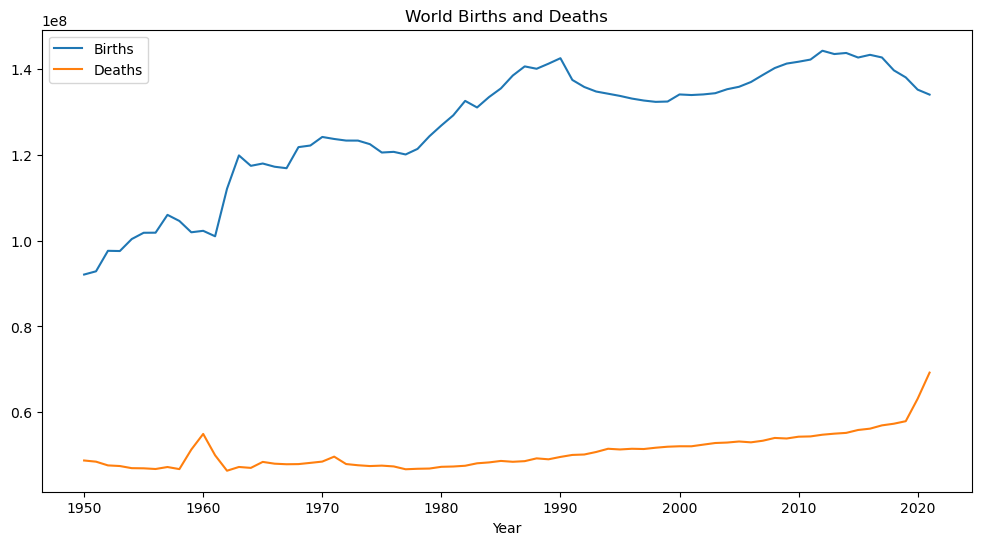

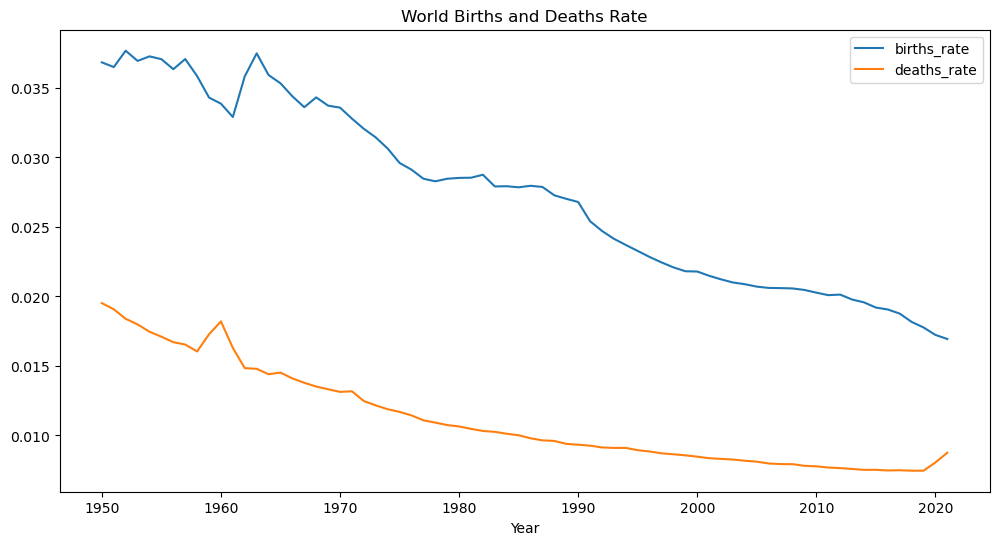

In [102]:
#时间序列分析
# 分析全球每年出生人数和死亡人数的变化趋势

world_bd = bd.loc['World', ['Births', 'Deaths','Population']]  # type: ignore  # 选取全球数据
for i in world_bd.columns:     
    x = world_bd[i].mean()     # 计算均值
    world_bd.fillna({i:x}, inplace=True)   # 用均值填充缺失值
world_bd['births_rate'] = world_bd['Births'] / world_bd['Population']   # 计算的出生率
world_bd['deaths_rate'] = world_bd['Deaths'] / world_bd['Population']   # 计算的死亡率
display(world_bd.describe(include='all'))  # 探索数据
display(world_bd.head())  # 显示前几行数据

world_bd[['Births', 'Deaths']].plot(figsize=(12, 6))    # 绘制折线图
plt.title('World Births and Deaths')  # 设置标题
plt.show()  # 显示图表

# 分析全球每年出生率和死亡率的变化趋势
world_bd[['births_rate', 'deaths_rate']].plot(figsize=(12, 6))    # 绘制折线图
plt.title('World Births and Deaths Rate')  # 设置标题
plt.show()  # 显示图表

